In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df = pd.read_csv('Customer_Churn_Data_Large.csv', sep=',')

In [110]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel'], dtype='object')

AGE

In [111]:
age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_mode = df['Age'].mode()

In [112]:
df['Age'].value_counts()

Age
21    30
23    26
54    26
18    24
53    24
68    24
69    23
25    22
48    22
37    22
41    22
38    22
30    22
45    21
64    21
63    21
27    21
36    20
61    20
47    20
42    20
59    20
24    20
34    20
52    19
51    19
56    19
28    19
66    19
44    19
46    19
58    18
33    18
67    18
26    18
50    18
43    18
57    17
19    17
55    17
35    17
31    16
20    16
22    16
29    15
39    15
62    14
60    14
65    14
40    13
32    13
49    12
Name: count, dtype: int64

In [113]:
print(age_mean)
print(age_median)
print(age_mode)

43.267
43.0
0    21
Name: Age, dtype: int64


GENDER

In [114]:
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [115]:
df['Gender'].value_counts()

Gender
F    513
M    487
Name: count, dtype: int64

MARITIAL STATUS

In [116]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Widowed', 'Divorced'], dtype=object)

In [117]:
df['MaritalStatus'].value_counts()

MaritalStatus
Widowed     276
Married     261
Divorced    248
Single      215
Name: count, dtype: int64

Income Level

In [118]:
df['IncomeLevel'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [119]:
df['IncomeLevel'].value_counts()

IncomeLevel
High      349
Medium    326
Low       325
Name: count, dtype: int64

In [120]:
df

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium
...,...,...,...,...,...
995,996,54,F,Single,Low
996,997,19,M,Widowed,High
997,998,47,M,Married,Low
998,999,23,M,Widowed,High


In [121]:
df_copy =df.copy()

In [122]:
df_copy

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium
...,...,...,...,...,...
995,996,54,F,Single,Low
996,997,19,M,Widowed,High
997,998,47,M,Married,Low
998,999,23,M,Widowed,High


In [123]:
df_copy.drop('CustomerID', axis=1, inplace=True)

In [124]:
df_copy

,Age,Gender,MaritalStatus,IncomeLevel
0,62,M,Single,Low
1,65,M,Married,Low
2,18,M,Single,Low
3,21,M,Widowed,Low
4,21,M,Divorced,Medium
...,...,...,...,...
995,54,F,Single,Low
996,19,M,Widowed,High
997,47,M,Married,Low
998,23,M,Widowed,High


In [143]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
s = StandardScaler()
l = LabelEncoder()
o = OneHotEncoder(sparse_output=False)
ord = OrdinalEncoder()

In [127]:
df_copy[['Age']] = s.fit_transform(df_copy[['Age']])

In [131]:
df_copy['Gender'] = l.fit_transform(df_copy['Gender'])

In [144]:
encoded_marital = o.fit_transform(df_copy[['MaritalStatus']])

In [145]:
encoded_df = pd.DataFrame(encoded_marital, columns=o.get_feature_names_out())

In [146]:
encoded_df

,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed
0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
995,0.0,0.0,1.0,0.0
996,0.0,0.0,0.0,1.0
997,0.0,1.0,0.0,0.0
998,0.0,0.0,0.0,1.0


In [148]:
df_copy.drop('MaritalStatus',axis=1,  inplace=True)

In [150]:
df_copy = df_copy.join(encoded_df)

In [153]:
df_copy['IncomeLevel'] = ord.fit_transform(df[['IncomeLevel']])

In [210]:
df_copy.to_csv('Updatedcc.csv')

INFERENCES

In [167]:
df_copy.corr(method='spearman')

,Age,Gender,IncomeLevel,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed
Age,1.000000,-0.013497,0.027796,0.000096,0.010288,-0.010568,-0.000488
Gender,-0.013497,1.000000,-0.011911,0.005671,0.022290,0.011176,-0.037649
IncomeLevel,0.027796,-0.011911,1.000000,0.007935,-0.041513,0.023137,0.011855
MaritalStatus_Divorced,0.000096,0.005671,0.007935,1.000000,-0.341283,-0.300539,-0.354570
MaritalStatus_Married,0.010288,0.022290,-0.041513,-0.341283,1.000000,-0.311016,-0.366930
MaritalStatus_Single,-0.010568,0.011176,0.023137,-0.300539,-0.311016,1.000000,-0.323124
MaritalStatus_Widowed,-0.000488,-0.037649,0.011855,-0.354570,-0.366930,-0.323124,1.000000


<Axes: >

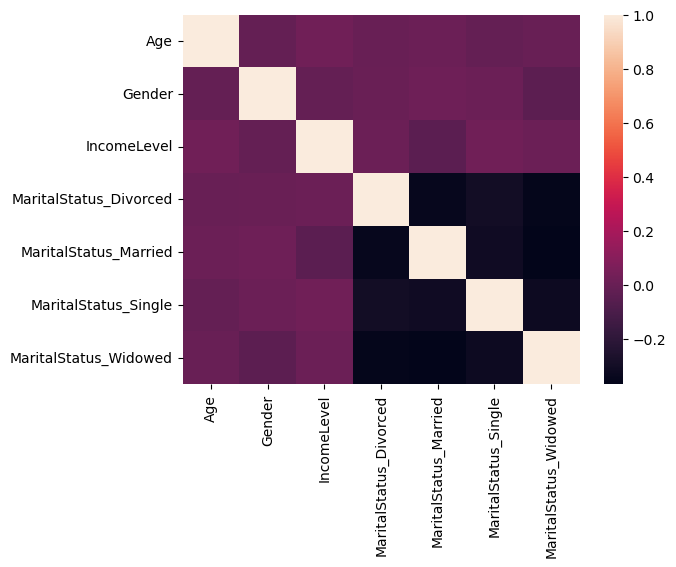

In [160]:
sns.heatmap(df_copy.corr(method='spearman'))

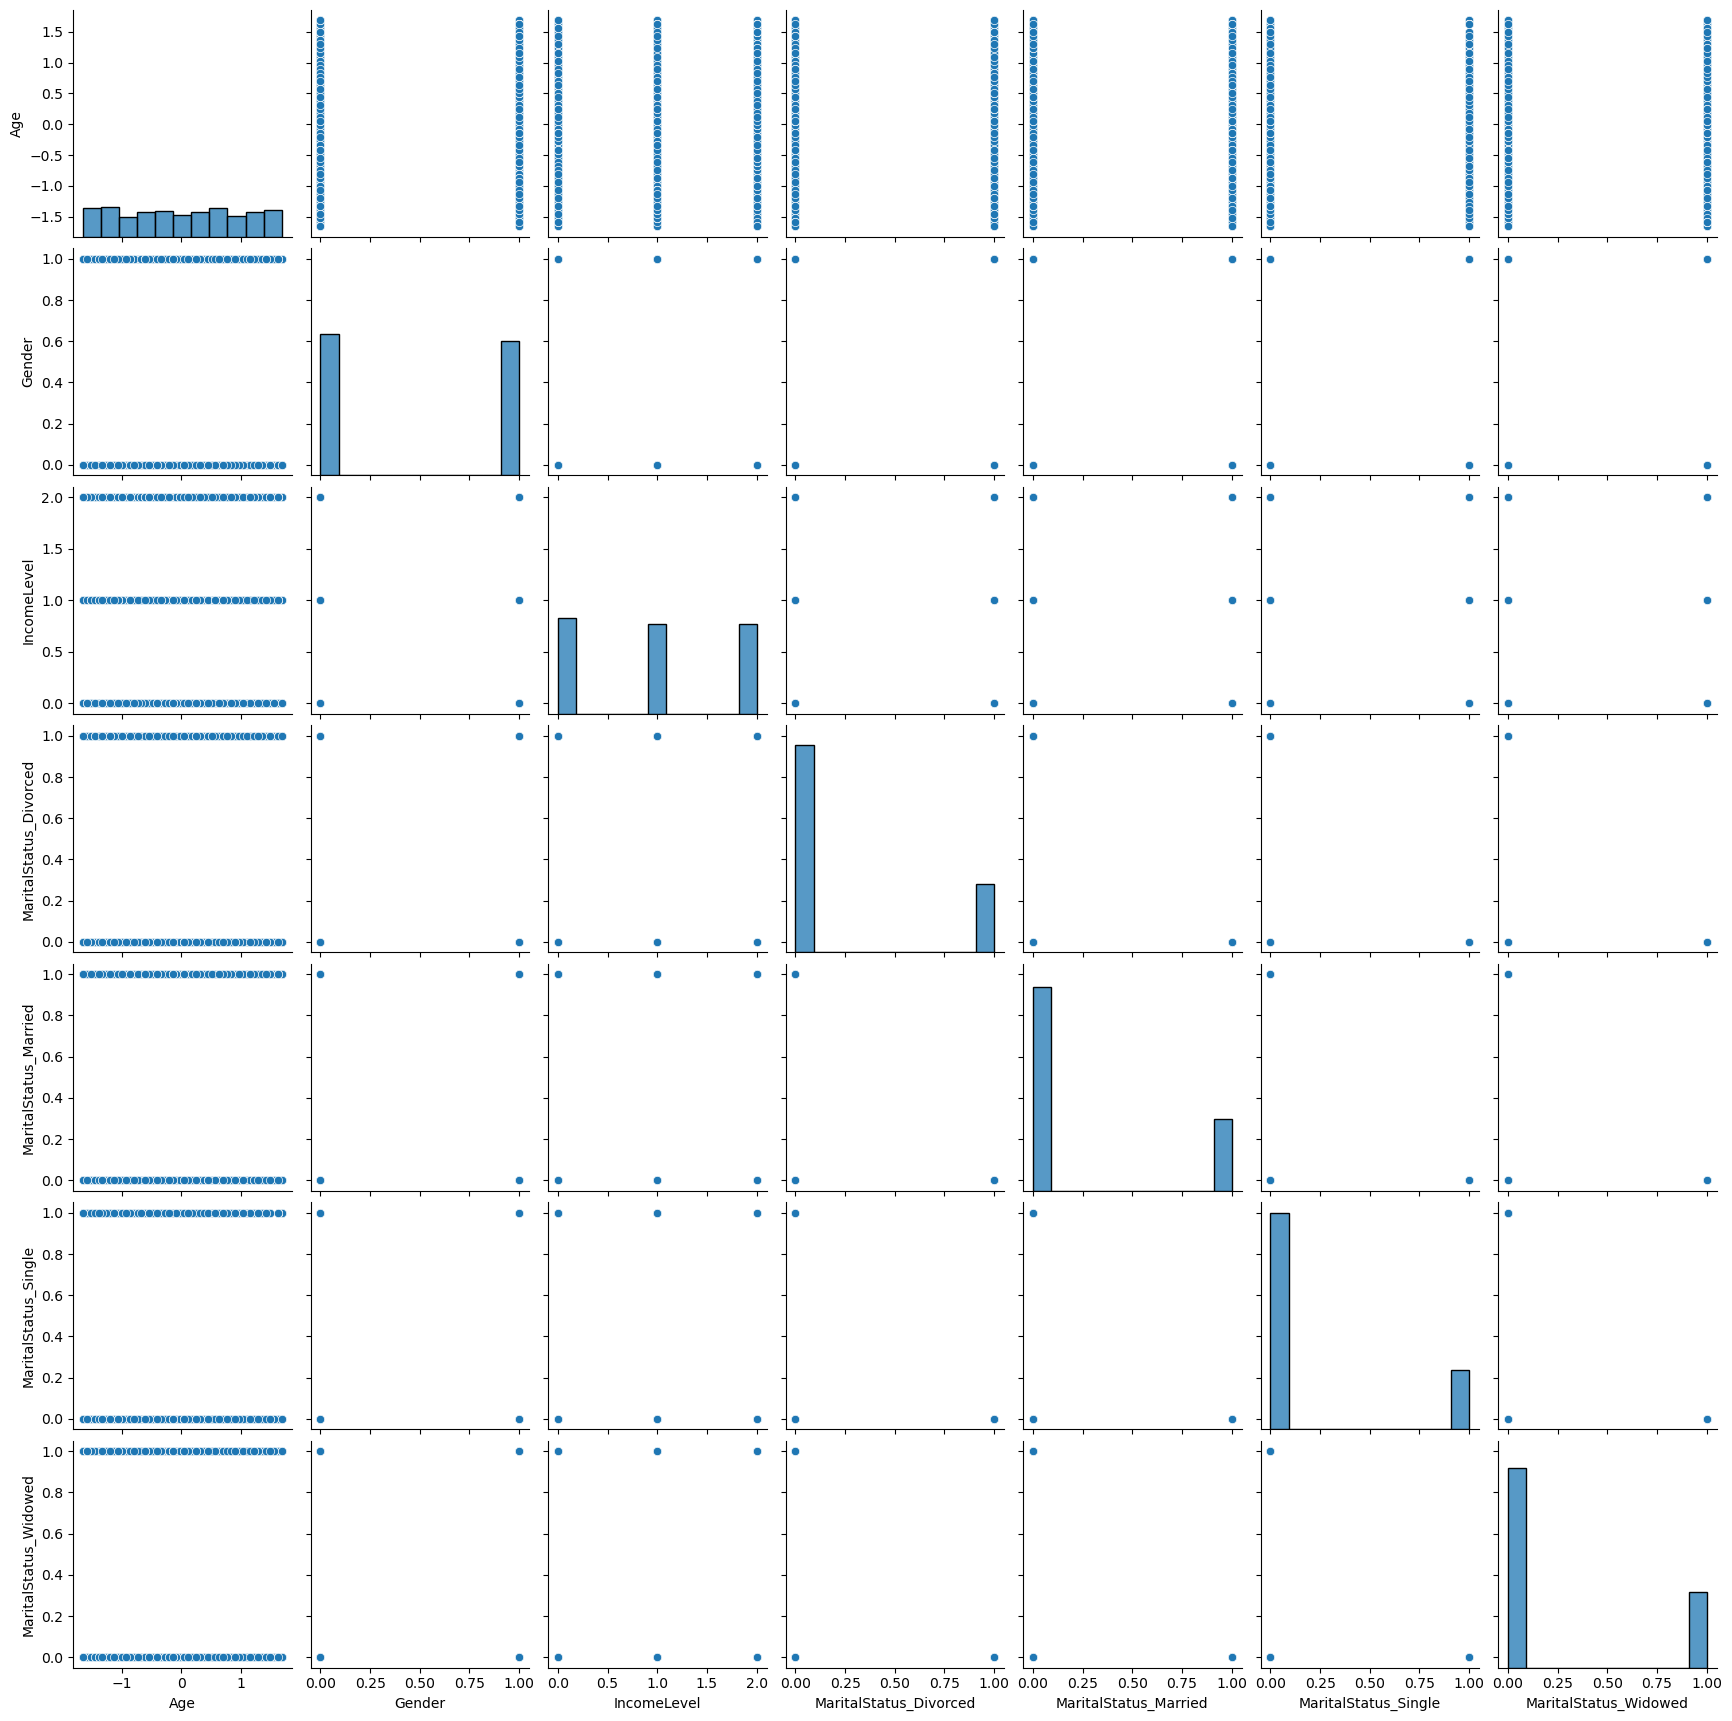

In [161]:
sns.pairplot(df_copy)

In [162]:
df

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium
...,...,...,...,...,...
995,996,54,F,Single,Low
996,997,19,M,Widowed,High
997,998,47,M,Married,Low
998,999,23,M,Widowed,High


In [168]:
df['Age'].value_counts()

Age
21    30
23    26
54    26
18    24
53    24
68    24
69    23
25    22
48    22
37    22
41    22
38    22
30    22
45    21
64    21
63    21
27    21
36    20
61    20
47    20
42    20
59    20
24    20
34    20
52    19
51    19
56    19
28    19
66    19
44    19
46    19
58    18
33    18
67    18
26    18
50    18
43    18
57    17
19    17
55    17
35    17
31    16
20    16
22    16
29    15
39    15
62    14
60    14
65    14
40    13
32    13
49    12
Name: count, dtype: int64

In [169]:
df['Gender'].value_counts()

Gender
F    513
M    487
Name: count, dtype: int64

In [170]:
df['IncomeLevel'].value_counts()

IncomeLevel
High      349
Medium    326
Low       325
Name: count, dtype: int64

In [171]:
df['MaritalStatus'].value_counts()

MaritalStatus
Widowed     276
Married     261
Divorced    248
Single      215
Name: count, dtype: int64

    MARITIAL STATUS BAR PLOT

Text(0, 0.5, 'Count')

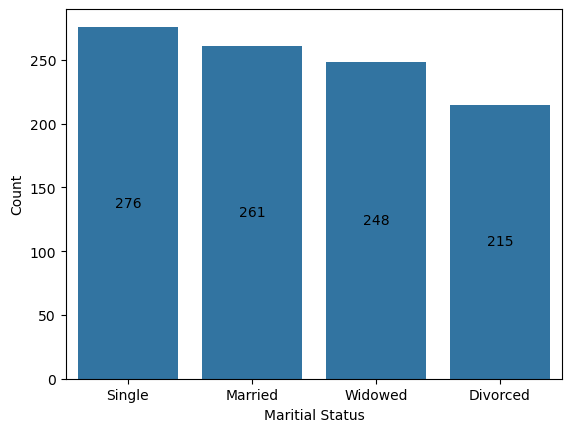

In [175]:
x = df['MaritalStatus'].unique()
y = [276, 261, 248, 215]
ax = sns.barplot(x=x,y=y)
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.xlabel('Maritial Status')
plt.ylabel('Count')

INCOME LEVEL

Text(0, 0.5, 'Count')

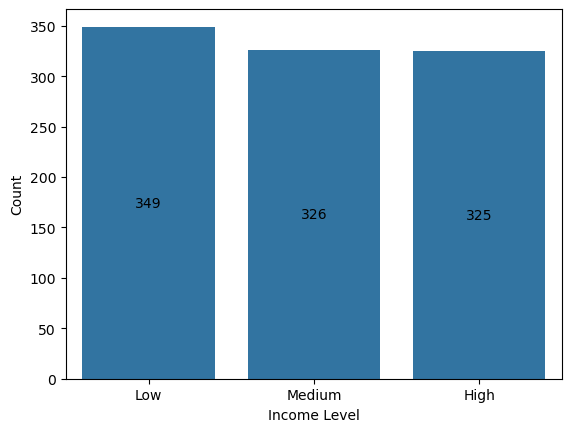

In [176]:
x = df['IncomeLevel'].unique()
y = [ 349,326,325]
ax = sns.barplot(x=x,y=y)
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.xlabel('Income Level')
plt.ylabel('Count')

Gender

Text(0, 0.5, 'Count')

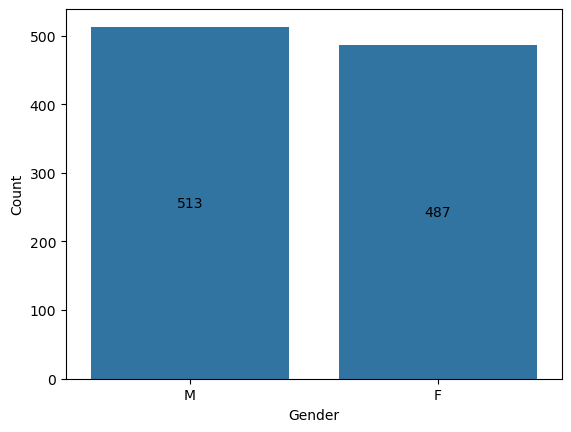

In [177]:
x = df['Gender'].unique()
y = [513,487]
ax = sns.barplot(x=x,y=y)
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.xlabel('Gender')
plt.ylabel('Count')

In [206]:
x_1  = df['Age'].value_counts().values[:10]
y_1 = df['Age'].value_counts().index[:10]

Text(0, 0.5, 'Count')

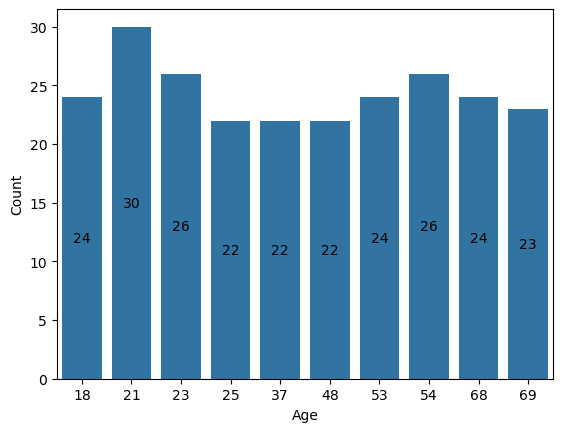

In [208]:
x = y_1 = df['Age'].value_counts().index[:10]
y = df['Age'].value_counts().values[:10]
ax = sns.barplot(x=x,y=y)
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.xlabel('Age')
plt.ylabel('Count')